In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [4]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from 'C:\\Users\\pavan\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\keras\\datasets\\fashion_mnist.py'>

TypeError: Invalid shape (784,) for image data

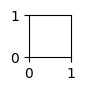

In [18]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    
plt.show()

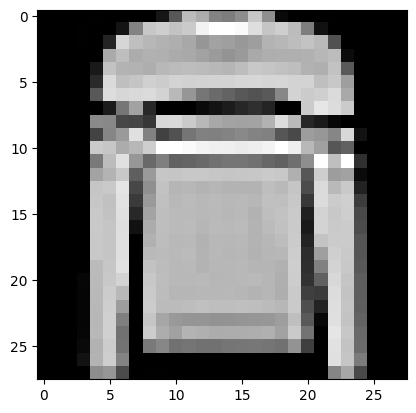

In [6]:
plt.imshow(x_train[5],cmap="gray")
plt.show()

In [10]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [8]:
x_train=x_train.reshape((x_train.shape[0],-1))
x_test=x_test.reshape((x_test.shape[0],-1))

In [9]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import optimizers

In [14]:
model=Sequential()
model.add(Dense(50,input_shape=(784, )))
model.add(Activation("sigmoid"))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,batch_size=200,epochs=50,verbose=1)

Epoch 1/50
300/300 [==============================] - 16s 4ms/step - loss: 2.1783 - accuracy: 0.3628
Epoch 2/50
300/300 [==============================] - 1s 3ms/step - loss: 1.9379 - accuracy: 0.5511
Epoch 3/50
300/300 [==============================] - 1s 3ms/step - loss: 1.7263 - accuracy: 0.6108
Epoch 4/50
300/300 [==============================] - 1s 3ms/step - loss: 1.5265 - accuracy: 0.6539
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 1.3650 - accuracy: 0.6875
Epoch 6/50
300/300 [==============================] - 1s 3ms/step - loss: 1.2350 - accuracy: 0.7123
Epoch 7/50
300/300 [==============================] - 1s 3ms/step - loss: 1.1261 - accuracy: 0.7287
Epoch 8/50
300/300 [==============================] - 1s 3ms/step - loss: 1.0372 - accuracy: 0.7394
Epoch 9/50
300/300 [==============================] - 1s 3ms/step - loss: 0.9627 - accuracy: 0.7506
Epoch 10/50
300/300 [==============================] - 1s 3ms/step - loss: 0.9009 - accuracy: 0.762

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 21s 2ms/step - loss: 0.4898 - accuracy: 0.8281


[0.4897821247577667, 0.8281000256538391]

In [1]:
import cv2

In [2]:
cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile=cv2.CascadeClassifier('harrcascade_smile.xml')

In [9]:
cap=cv2.VideoCapture(0)
while True:
    ret,img=cap.read()
    g=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f=cascade.detectMultiScale(g,scaleFactor=1.3,minNeighbors=5,minSize=(30,30))
    
    for (x,y,w,h) in f:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
        gray_r=g[y : y+h , x : x+w]
        s=smile.detectMultiScale(gray_r,scaleFactor=1.5,minNeighbors=15,minSize=(25,25))
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(gray_r, (sx,sy), (sx+sw,sy+sh), (0,255,0), 2) # Draw a rectangle around the smile
            cv2.putText(img, "SMILING", (x, y-30), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3, cv2.LINE_AA)
       
    cv2.imshow('vedio',img)
    k=cv2.waitKey(30) & 0xff
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()
        

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [3]:
import cv2

# Load face cascade and smile cascade classifiers
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

# Start capturing video from the default camera
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, img = cap.read()
    
    # Convert the frame to grayscale for detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    
    # For each detected face, detect smiles and highlight them in the frame
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2) # Draw a rectangle around the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=15, minSize=(25, 25))
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,255,0), 2) # Draw a rectangle around the smile
            cv2.putText(img, "SMILING", (x, y-30), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3, cv2.LINE_AA)
    
    # Display the frame in a window
    cv2.imshow('video', img)
    
    # Exit the loop when the 'Esc' key is pressed
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

# Release the camera and close the window
cap.release()
cv2.destroyAllWindows()
